Demo: Regression on real-life dataset with scikit-learn
-----

By The End Of This Session You Should Be Able To:
----

- Fit OLS regression model with scikit-learn
- Be able to interpert the model fit statistics and the coefficents
- Fit the following regularized regression models with scikit-learn
    - Lasso (L1)
    - Ridge (L2)
    - ElasticNet (L1+L2)
- Explain how regularization effects the model fit statistics and the coefficents

In [26]:
reset -fs

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [28]:
from sklearn.datasets import load_boston

boston = load_boston()

Read about [The Boston Housing Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [29]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30,
                                                    random_state=42)


Please take a moment and read the docs about [scikit-learn's GLM](http://scikit-learn.org/stable/modules/linear_model.html)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
y_predicted = lm.predict(X_test)

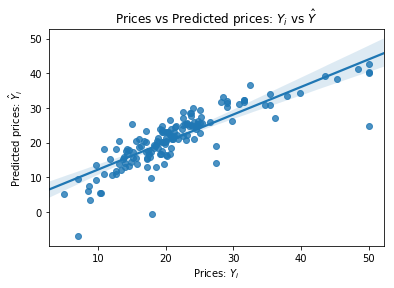

In [36]:
ax = sns.regplot(y_test, y_predicted);
ax.set_xlabel("Prices: $Y_i$")
ax.set_ylabel("Predicted prices: $\hat{Y}_i$")
ax.set_title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}$");

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mse = mean_squared_error(y_test, y_predicted)
print(f"{mse:.4}")

21.52


Let's bundle all those cells into a fuction

In [39]:
def fit_regression(model, X, y) -> float:
    "Fit a regression model, returning mse. Use code above an example."
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=0.30,
                                                        random_state=42)

    ### BEGIN SOLUTION
    reg = model()
    reg.fit(X_train, y_train)
    y_predicted = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_predicted)
    return mse
    ### END SOLUTION

In [40]:
"""
1 point
Test code for the 'fit_regression' function
This cell should NOT give any errors when it is run.
"""

mse_ols = fit_regression(model=LinearRegression, X=X, y=y)
assert round(mse_ols, 4) == 21.5174

----

Now let's apply our function to the regularized forms of regression

In [41]:
from sklearn.linear_model import Lasso

In [42]:
mse_lasso = fit_regression(model=Lasso, X=X, y=y)
print(f"{mse_lasso:.4}")

25.64


In [43]:
from sklearn.linear_model import Ridge

In [44]:
mse_ridge = fit_regression(model=Ridge, X=X, y=y)
print(f"{mse_ridge:.4}")

22.04


In [45]:
from sklearn.linear_model import ElasticNet

In [51]:
ElasticNet?

In [46]:
mse_elastic = fit_regression(model=ElasticNet, X=X, y=y)
print(f"{mse_elastic:.4}")

25.41


In [47]:
mse_all = {'ols'    : mse_ols,
           'lasso'  : mse_lasso, 
           'ridge'  : mse_ridge, 
           'elastic': mse_elastic}

for name, mse, in mse_all.items():
    print(f"{name:<7}: {mse:.4}")

ols    : 21.52
lasso  : 25.64
ridge  : 22.04
elastic: 25.41


Which models fits the data the best? Why? (ungraded)

Which models fits the data the worst? Why? (ungraded)


Let's compare coefficients

In [48]:
def reg_equation(coefs, names=None):
    "Create the regression equation with coefficents and names"
    if names is None:
        # Assign numbers to betas
        names = [f"X{_}" for _ in range(len(coefs))]
    equation = " \t+ \n".join("{:>6.3f}*{}".format(c, n.lower())
                                   for c, n in zip(coefs, names))
    return equation

In [49]:
print("OLS")
print(reg_equation(lm.coef_, names=boston.feature_names))
print()

print("Lasso")
lasso = Lasso()
lasso.fit(X_train, y_train)
print(reg_equation(lasso.coef_, names=boston.feature_names))
print()

print("Ridge")
ridge = Ridge()
ridge.fit(X_train, y_train)
print(reg_equation(ridge.coef_, names=boston.feature_names))
print()

print("ElasticNet")
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
print(reg_equation(elasticnet.coef_, names=boston.feature_names))

OLS
-0.133*crim 	+ 
 0.036*zn 	+ 
 0.050*indus 	+ 
 3.120*chas 	+ 
-15.417*nox 	+ 
 4.057*rm 	+ 
-0.011*age 	+ 
-1.386*dis 	+ 
 0.243*rad 	+ 
-0.009*tax 	+ 
-0.911*ptratio 	+ 
 0.012*b 	+ 
-0.547*lstat

Lasso
-0.092*crim 	+ 
 0.035*zn 	+ 
-0.000*indus 	+ 
 0.000*chas 	+ 
-0.000*nox 	+ 
 1.281*rm 	+ 
 0.011*age 	+ 
-0.616*dis 	+ 
 0.192*rad 	+ 
-0.010*tax 	+ 
-0.703*ptratio 	+ 
 0.011*b 	+ 
-0.780*lstat

Ridge
-0.128*crim 	+ 
 0.037*zn 	+ 
 0.018*indus 	+ 
 2.933*chas 	+ 
-7.848*nox 	+ 
 4.064*rm 	+ 
-0.017*age 	+ 
-1.272*dis 	+ 
 0.225*rad 	+ 
-0.009*tax 	+ 
-0.827*ptratio 	+ 
 0.012*b 	+ 
-0.563*lstat

ElasticNet
-0.110*crim 	+ 
 0.042*zn 	+ 
-0.000*indus 	+ 
 0.000*chas 	+ 
-0.000*nox 	+ 
 1.056*rm 	+ 
 0.012*age 	+ 
-0.723*dis 	+ 
 0.245*rad 	+ 
-0.012*tax 	+ 
-0.737*ptratio 	+ 
 0.011*b 	+ 
-0.794*lstat


How do the magnitudes of the coefficients change with the different regularization? Why? (ungraded)